In [ ]:
import numpy as np
from scipy.stats import ttest_ind

def generate_random_numbers(mean, variance, size):
  return np.random.normal(loc=mean, scale=np.sqrt(variance), size=size)
def perform_t_test(sample1, sample2):
    t_statistic, p_value = ttest_ind(sample1, sample2)
    return t_statistic, p_value
mean1, mean2 = 54, 59
variance = 6.9
sample_size = 75
sample1 = generate_random_numbers(mean1, variance, sample_size)
sample2 = generate_random_numbers(mean2, variance, sample_size)
t_statistic, p_value = perform_t_test(sample1, sample2)
print("Results of t-test:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Samples are significantly different")
else:
    print("Accept the null hypothesis: Samples are not significantly different")


Results of t-test:
T-statistic: -10.037287281819497
P-value: 2.096289988885318e-18
Reject the null hypothesis: Samples are significantly different


In [ ]:
import numpy as np
from scipy.stats import ttest_ind

def perform_welch_t_test(sample1, sample2):
    t_statistic, p_value = ttest_ind(sample1, sample2, equal_var=False)
    return t_statistic, p_value

mean1, mean2 = 54, 59
variance1, variance2 = 6.9, 5.966
sample_size = 75

sample1 = np.random.normal(loc=mean1, scale=np.sqrt(variance1), size=sample_size)
sample2 = np.random.normal(loc=mean2, scale=np.sqrt(variance2), size=sample_size)

t_statistic, p_value = perform_welch_t_test(sample1, sample2)

print("Results of Welch's t-test:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Samples are significantly different.")
else:
    print("Accept the null hypothesis: Samples are not significantly different.")


Results of Welch's t-test:
T-statistic: -12.937873573447648
P-value: 4.992278472145773e-26
Reject the null hypothesis: Samples are significantly different.


 Wilcoxon Signed Rank Test
 ALGORTIHM
 1.START
 2.FROM THE CORRESPONDING VALUES OF x2 AND x1 FIND THE DIFFERENCE AND THE ABSOULTE DIFFERENCE BETWEEN THE TWO
 3.ASSOCIATE CHARACTER p OR n DEPENDING ON THE VALUE OF DIFFERENCE:
  if diff>0:-p
  else:-n
 4.FIND THE RANK OF THE VALUES FROM THE ABSOULTE DIFFERENCE:
   rank-arrange the values of the absoulte difference in ascending order and rank them chronological(1,2,..,n)
  5.SUM THE RANK OF ASSOCIATED WITH 'p' AND 'n' TO FIND THE SUM OF RANKS ASSOCIATED TO THE +VE DIFFERENCE AND -VE DIFFERENCE RESPECTIVELY
  6.CREATE A DATAFRAME OF THE ASSOCIATED VALUES FOUND
  7.FIND THE MINIMUM OF THE TWO SUMS FOUND IN STEP 6, THIS THE TEST STATISTIC.
  8.FIND THE CRITICAL VALUE FOR THE GIVEN SAMPLE SIZE 'n' FOR THE GIVE CRITICAL REGION(HERE: ALPHA=0.05)
  9.if test_statistic< value of critical region reject the null hypothesis.otherwise accept.THE ASSOCIATED NULL HYPOTHESIS HERE IS ASSUMED TO BE H0:NO SIGNIFICANT DIFFERENCE.
  10.PRINT THE RESULTS
  11.STOP.


In [ ]:
import pandas as pd

NULL HYPOTHESIS H0:NO SIGNIFICANT STATISTICAL DIFFERENCE

In [ ]:
x2=[129,115,134,140,144,115,144,125,148,135]
x1=[118,112,133,120,148,124,131,137,143,145]
print(len(x1))
print(len(x2))
diff=[]

10
10


In [ ]:
for val_x2, val_x1 in zip(x2, x1):
    difference = val_x2 - val_x1
    diff.append(difference)

print(diff)

[11, 3, 1, 20, -4, -9, 13, -12, 5, -10]


In [ ]:
abs_diff=[abs(difference) for difference in diff]
print(abs_diff)
print(len(set(abs_diff)))

[11, 3, 1, 20, 4, 9, 13, 12, 5, 10]
10


In [ ]:
count=['p' if difference > 0 else 'n' for difference in diff]

In [ ]:
df=pd.DataFrame({
    'x2':x2,
    'x1':x1,
    'diff':diff,
    'abs_diff':abs_diff,
    'count':count
})
print(df)

    x2   x1  diff  abs_diff count
0  129  118    11        11     p
1  115  112     3         3     p
2  134  133     1         1     p
3  140  120    20        20     p
4  144  148    -4         4     n
5  115  124    -9         9     n
6  144  131    13        13     p
7  125  137   -12        12     n
8  148  143     5         5     p
9  135  145   -10        10     n


In [ ]:
df['rank']=df['abs_diff'].rank().astype(int)
print(df)

    x2   x1  diff  abs_diff count  rank
0  129  118    11        11     p     7
1  115  112     3         3     p     2
2  134  133     1         1     p     1
3  140  120    20        20     p    10
4  144  148    -4         4     n     3
5  115  124    -9         9     n     5
6  144  131    13        13     p     9
7  125  137   -12        12     n     8
8  148  143     5         5     p     4
9  135  145   -10        10     n     6


In [ ]:
sum_pos=df.loc[df['count']=='p','rank'].sum()
sum_neg=df.loc[df['count']=='n','rank'].sum()
print("Sum of positive associated rank:",sum_pos)
print("Sum of negative associated rank:",sum_neg)

Sum of positive associated rank: 33
Sum of negative associated rank: 22


In [ ]:
test_statistic=min(sum_pos,sum_neg)
print(test_statistic)

22


In [ ]:
#from table for critical value where n=10 and los=0.05
critical_value=10
if test_statistic <= critical_value:
  print("The null hypothesis is rejected.Enough evidence to prove that there is significant statistic difference")
else:
  print("The null hypothesis is accepted. Not enough statistical evidence to prove that there is a significant statistical difference between the two groups")


The null hypothesis is accepted. Not enough statistical evidence to prove that there is a significant statistical difference between the two groups


Mann and Whitney’s U-test
ALGORTIHM
1.START
2.COMBINE THE TWO SAMPLES B1 AND B2
3.SORT THE SAMPLES CHORONOLOGICALLY
4.FIND THE SUM OF THE RANKS FOR THE TWO SAMPLE SETS B1 AND B2.
5.FIND THE U STATISITC
U1=n1*n2-R1+(n(n1+1)/2)
U2=n1*n2-R2+(n(n2+1)/2)
U=min(U1,U2)
6.COMPARE THE TEST STATISTIC TO THE CRITICAL VALUE
if U<=critical value reject the null hypothesis else accept the null hypothesis

In [ ]:
from scipy.stats import rankdata
import pandas as pd
import numpy as np

In [ ]:
b1=[9,5,3,4,7,6,3,8,9,3]
b2=[7,6,3,8,2,5,3,4,7,10]
print(len(b1),len(b2))
comb=sorted((b1+b2))
print(comb)

10 10
[2, 3, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 9, 9, 10]


In [ ]:
ranks=rankdata(comb)
for value, rank in zip(comb, ranks):
    print(f'Value: {value}, Rank: {rank}')

Value: 2, Rank: 1.0
Value: 3, Rank: 4.0
Value: 3, Rank: 4.0
Value: 3, Rank: 4.0
Value: 3, Rank: 4.0
Value: 3, Rank: 4.0
Value: 4, Rank: 7.5
Value: 4, Rank: 7.5
Value: 5, Rank: 9.5
Value: 5, Rank: 9.5
Value: 6, Rank: 11.5
Value: 6, Rank: 11.5
Value: 7, Rank: 14.0
Value: 7, Rank: 14.0
Value: 7, Rank: 14.0
Value: 8, Rank: 16.5
Value: 8, Rank: 16.5
Value: 9, Rank: 18.5
Value: 9, Rank: 18.5
Value: 10, Rank: 20.0


In [ ]:
sum_ranks_b1=0
sum_ranks_b2=0
for value in b1:
    index=comb.index(value)
    sum_ranks_b1+=ranks[index]
for value in b2:
    index=comb.index(value)
    sum_ranks_b2 +=ranks[index]
print(sum_ranks_b1)
print(sum_ranks_b2)

108.0
102.0


In [ ]:
n1=len(b1)
n2=len(b2)
U1=n1 * n2 - rank_sum_b1 + (n1 * (n1 + 1)) // 2
U2=n1 * n2 - rank_sum_b2 + (n2 * (n2 + 1)) // 2
U=min(U1, U2)
critical_value=n1*n2/2
print(f'Mann-Whitney U statistic: {U}')
print(f'Critical Value: {critical_value}')
if U <= critical_value:
  print('The null hypothesis is rejected. There is a sufficient statistical evidence to prove significant difference.')
else:
  print('The null hypothesis is acceptedd. There is a insufficient statistical evidence to prove significant difference.')

Mann-Whitney U statistic: 0
Critical Value: 50.0
The null hypothesis is rejected. There is a sufficient statistical evidence to prove significant difference.


ANOVA-to check the significant differences in the mean absolute blood pressure reductions across the different groups.

In [ ]:
import pandas as pd

In [ ]:
before_m1=[142,145,138,150,144]
after_m1=[126,118,122,123,120]
before_m2=[137,140,146,143,139]
after_m2=[122,120,118,125,123]
m1=[]
m2=[]
for i in range(len(before_m1)):
   m1.append(abs(after_m1[i] - before_m1[i]))
   m2.append(abs(after_m2[i] - before_m2[i]))
print(m1,m2)

[16, 27, 16, 27, 24] [15, 20, 28, 18, 16]


In [ ]:
sum_m1=sum(m1)
sum_m2=sum(m2)
Sum=sum_m1+sum_m2
ss_factor=(((sum_m1*sum_m1)/len(m1))+((sum_m2*sum_m2)/len(m2)))-((Sum*Sum)/(len(m1+m2)))
#ss_total
x=0
for i in m1+m2:
  x=x+(i*i)
  print(x)

256
985
1241
1970
2546
2771
3171
3955
4279
4535


In [ ]:
ss_total=x-((Sum*Sum)/(len(m1+m2)))
ss_error=ss_total-ss_factor
print("SSfactor=",ss_factor)
print("SStotal=",ss_total)
print("SSerror=",ss_error)

SSfactor= 16.900000000000546
SStotal= 250.10000000000036
SSerror= 233.19999999999982


In [ ]:
ms_factor=ss_factor/(2-1)
ms_error=ss_error/(5-2)
F=ms_factor/ms_error
print("The test statistic=",F)

The test statistic= 0.2174099485420312


In [ ]:
cvalue=1.96
if F<cvalue:
  print("The null hypothesis is rejected.There is sufficient statistical evidence to prove variations in the mean blood pressure  caused by two different medications")
else:
  print("The null hypothesis is accepted.There is insufficient statistical evidence to prove variations in the mean blood pressure caused by two different medications")

The null hypothesis is rejected.There is sufficient statistical evidence to prove variations in the mean blood pressure  caused by two different medications


KRUSKAL WALIS TEST

In [ ]:
import pandas as pd

In [ ]:
d1=[72,28,63,40,66]
d2=[88,59,38,70,83]
d3=[53,49,91,68,44]
sample_data=sorted(d1+d2+d3)
print(sample_data)

[28, 38, 40, 44, 49, 53, 59, 63, 66, 68, 70, 72, 83, 88, 91]


In [ ]:
ranks=rankdata(sample_data)
for value, rank in zip(sample_data, ranks):
    print(f'Value: {value}, Rank: {rank}')

Value: 28, Rank: 1.0
Value: 38, Rank: 2.0
Value: 40, Rank: 3.0
Value: 44, Rank: 4.0
Value: 49, Rank: 5.0
Value: 53, Rank: 6.0
Value: 59, Rank: 7.0
Value: 63, Rank: 8.0
Value: 66, Rank: 9.0
Value: 68, Rank: 10.0
Value: 70, Rank: 11.0
Value: 72, Rank: 12.0
Value: 83, Rank: 13.0
Value: 88, Rank: 14.0
Value: 91, Rank: 15.0


In [ ]:
sum_ranks_d1=0
sum_ranks_d2=0
sum_ranks_d3=0
for value in d1:
    index=sample_data.index(value)
    sum_ranks_d1+=ranks[index]
for value in d2:
    index=sample_data.index(value)
    sum_ranks_d2+=ranks[index]
for value in d3:
    index=sample_data.index(value)
    sum_ranks_d3+=ranks[index]

print(sum_ranks_d1)
print(sum_ranks_d2)
print(sum_ranks_d3)

33.0
47.0
40.0


In [ ]:
#15(15+1)=15*16=240
#12/240=0.05
#3(n+1)=3*16=48
H=(0.05*(((sum_ranks_d1**2)/5)+((sum_ranks_d2**2)/5)+((sum_ranks_d3**2)/5)))-48
print("The test statistic H=",H)

The test statistic H= 0.980000000000004


In [ ]:
criticalv=5.780
if criticalv<H:
  print("The null hypothesis is rejected.There is sufficient statistical evidence to prove variations in the mean blood pressure  caused by two different medications")
else:
  print("The null hypothesis is accepted.There is insufficient statistical evidence to prove variations in the mean blood pressure caused by two different medications")

The null hypothesis is accepted.There is insufficient statistical evidence to prove variations in the mean blood pressure caused by two different medications


chi squared

In [ ]:
import scipy.stats as stats

observed_counts=[868,488,430,216]
expected_ratios=[5, 3, 2, 1]
total_insects = sum(observed_counts)

expected_counts=[ratio * total_insects / sum(expected_ratios) for ratio in expected_ratios]

chi_squared_statistic, p_value=stats.chisquare(f_obs=observed_counts, f_exp=expected_counts, ddof=1)

critical_value=7.82

result="Null hypothesis is rejected-significant statistical difference" if chi_squared_statistic > critical_value else "Null hypothesis accepted-not significant statistical difference"

print(f"Chi-squared Statistic: {chi_squared_statistic}")
print(f"P-value: {p_value}")
print(f"Critical Value: {critical_value}")
print(result)


Chi-squared Statistic: 26.418315018315017
P-value: 1.833731659532494e-06
Critical Value: 7.82
Null hypothesis is rejected-significant statistical difference


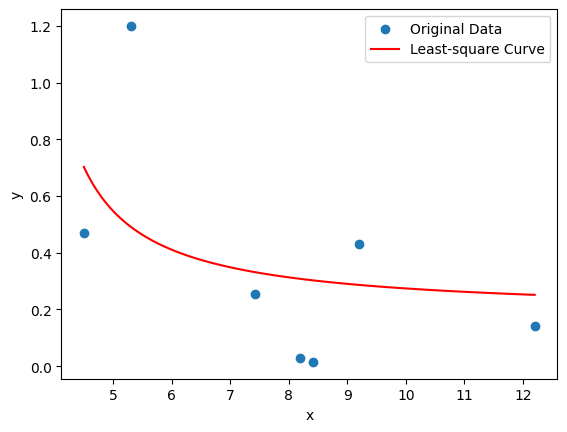

Fitted Parameters: a=0.18291567190116848,b=-3.328715375307803


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
x_data=np.array([5.3, 4.5, 7.43, 9.2, 8.2, 8.42, 12.2])
y_data=np.array([1.2, 0.47, 0.253, 0.43, 0.03, 0.015, 0.143])

def least_square_curve(x, a, b):
    return a * x / (x + b)

params,covariance=curve_fit(least_square_curve, x_data, y_data)

a_fit, b_fit=params

x_fit=np.linspace(min(x_data), max(x_data), 100)
y_fit=least_square_curve(x_fit, a_fit, b_fit)

plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_fit, y_fit, label='Least-square Curve', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(f"Fitted Parameters: a={a_fit},b={b_fit}")


8.Coorelation

In [ ]:
import numpy as np
math_scores=np.array([84, 85, 90, 70, 72, 75, 87, 82, 82, 88])
science_scores=np.array([85, 76, 92, 80, 65, 80, 92, 79, 85, 94])
correlation_coefficient=np.corrcoef(math_scores, science_scores)[0, 1]
print(f"Karl Pearson's Coefficient Correlation: {correlation_coefficient}")

Karl Pearson's Coefficient Correlation: 0.7352709437848041


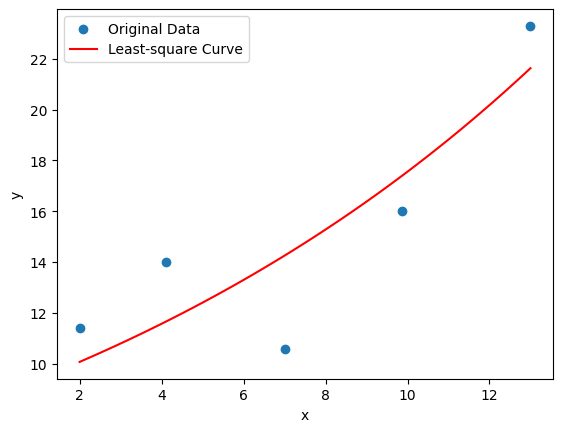

Fitted Parameters: a = 8.76015391637368, b = 0.06954526267536264


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Given data
x_data=np.array([2, 4.1, 7, 9.866, 13])
y_data=np.array([11.4, 14, 10.571, 16, 23.30])
def least_square_curve(x, a, b):
    return a * np.exp(b * x)
params, covariance=curve_fit(least_square_curve, x_data, y_data)
a_fit, b_fit=params
x_fit=np.linspace(min(x_data), max(x_data), 100)
y_fit=least_square_curve(x_fit, a_fit, b_fit)
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_fit, y_fit, label='Least-square Curve', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(f"Fitted Parameters: a = {a_fit}, b = {b_fit}")


In [ ]:
import scipy.stats
english_ranks = [3, 1, 2, 4, 5]
history_ranks = [2, 1, 4, 3, 5]
spearman_corr, _ = scipy.stats.spearmanr(english_ranks, history_ranks)
print(f"Spearman's Rank Order Correlation: {spearman_corr}")

Spearman's Rank Order Correlation: 0.7
